In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from os import listdir
import cv2
from keras.models import Sequential
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from skimage.io import imread,imshow,imsave
import math
from PIL import Image
import copy
from tqdm.notebook import tqdm as tq
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.callbacks import  LearningRateScheduler,ReduceLROnPlateau
from keras import applications
from keras.utils.data_utils import get_file
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
def Show(image):
  plt.figure()
  imshow(image ,cmap='gray')
  plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upload Data to Drive

## train

In [ ]:
# #train data
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
# !unzip '/content/ISIC-2017_Training_Data.zip' -d '/content/drive/MyDrive/Image segmentation/train'

--2022-01-02 02:25:15--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.9.20
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.9.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6229496702 (5.8G) [application/zip]
Saving to: ‘ISIC-2017_Training_Data.zip’

ISIC-2017_Training_ 100%[===================>]   5.80G  47.2MB/s    in 1m 59s  

2022-01-02 02:27:15 (49.9 MB/s) - ‘ISIC-2017_Training_Data.zip’ saved [6229496702/6229496702]

Archive:  /content/ISIC-2017_Training_Data.zip
   creating: /content/drive/MyDrive/Image segmentation/train/ISIC-2017_Training_Data/
  inflating: /content/drive/MyDrive/Image segmentation/train/ISIC-2017_Training_Data/ISIC-2017_Training_Data_metadata.csv  
  inflating: /content/drive/MyDrive/Image segmentation/train/ISIC-2017_Training_Data/ISIC_0000000.jpg  
  inf

In [ ]:
# #GT
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip
# !unzip '/content/ISIC-2017_Training_Part1_GroundTruth.zip' -d '/content/drive/MyDrive/Image segmentation/train'

--2022-01-02 02:30:18--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.87.228
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.87.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9321981 (8.9M) [application/zip]
Saving to: ‘ISIC-2017_Training_Part1_GroundTruth.zip’

ISIC-2017_Training_ 100%[===================>]   8.89M  43.3MB/s    in 0.2s    

2022-01-02 02:30:19 (43.3 MB/s) - ‘ISIC-2017_Training_Part1_GroundTruth.zip’ saved [9321981/9321981]

Archive:  /content/ISIC-2017_Training_Part1_GroundTruth.zip
   creating: /content/drive/MyDrive/Image segmentation/train/ISIC-2017_Training_Part1_GroundTruth/
  inflating: /content/drive/MyDrive/Image segmentation/train/ISIC-2017_Training_Part1_GroundTruth/ISIC_0000000_segmentation.png  
  inflating: /content/drive/MyDrive/Image s

## Valdation

In [ ]:
# #val data
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip
# !unzip '/content/ISIC-2017_Validation_Data.zip' -d '/content/drive/MyDrive/Image segmentation/val'

--2022-01-02 02:31:01--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.140.25
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.140.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 920895119 (878M) [application/zip]
Saving to: ‘ISIC-2017_Validation_Data.zip’

ISIC-2017_Validatio 100%[===================>] 878.23M  71.9MB/s    in 13s     

2022-01-02 02:31:14 (69.7 MB/s) - ‘ISIC-2017_Validation_Data.zip’ saved [920895119/920895119]

Archive:  /content/ISIC-2017_Validation_Data.zip
   creating: /content/drive/MyDrive/Image segmentation/val/ISIC-2017_Validation_Data/
  inflating: /content/drive/MyDrive/Image segmentation/val/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data_metadata.csv  
  inflating: /content/drive/MyDrive/Image segmentation/val/ISIC-2017_Validation_Data/ISIC_0001769.

In [ ]:
# #GT
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part1_GroundTruth.zip
# !unzip '/content/ISIC-2017_Validation_Part1_GroundTruth.zip' -d '/content/drive/MyDrive/Image segmentation/val'

--2022-01-02 02:31:40--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part1_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.160.179
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.160.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572320 (559K) [application/zip]
Saving to: ‘ISIC-2017_Validation_Part1_GroundTruth.zip’

ISIC-2017_Validatio 100%[===================>] 558.91K  --.-KB/s    in 0.1s    

2022-01-02 02:31:40 (5.70 MB/s) - ‘ISIC-2017_Validation_Part1_GroundTruth.zip’ saved [572320/572320]

Archive:  /content/ISIC-2017_Validation_Part1_GroundTruth.zip
   creating: /content/drive/MyDrive/Image segmentation/val/ISIC-2017_Validation_Part1_GroundTruth/
  inflating: /content/drive/MyDrive/Image segmentation/val/ISIC-2017_Validation_Part1_GroundTruth/ISIC_0001769_segmentation.png  
  inflating: /content/drive/MyDrive/

## test

In [ ]:
# #test data
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip
# !unzip '/content/ISIC-2017_Test_v2_Data.zip' -d '/content/drive/MyDrive/Image segmentation/test'

--2022-01-02 02:31:45--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.167.9
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.167.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5826753548 (5.4G) [application/zip]
Saving to: ‘ISIC-2017_Test_v2_Data.zip’

ISIC-2017_Test_v2_D 100%[===================>]   5.43G  80.7MB/s    in 97s     

2022-01-02 02:33:22 (57.1 MB/s) - ‘ISIC-2017_Test_v2_Data.zip’ saved [5826753548/5826753548]

Archive:  /content/ISIC-2017_Test_v2_Data.zip
   creating: /content/drive/MyDrive/Image segmentation/test/ISIC-2017_Test_v2_Data/
  inflating: /content/drive/MyDrive/Image segmentation/test/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data_metadata.csv  
 extracting: /content/drive/MyDrive/Image segmentation/test/ISIC-2017_Test_v2_Data/ISIC_0012086.jpg  
  inflating: /

In [ ]:
# #GT
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part1_GroundTruth.zip
# !unzip '/content/ISIC-2017_Test_v2_Part1_GroundTruth.zip' -d '/content/drive/MyDrive/Image segmentation/test'

--2022-01-02 02:35:34--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part1_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.108.243
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.108.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19120388 (18M) [application/zip]
Saving to: ‘ISIC-2017_Test_v2_Part1_GroundTruth.zip’

ISIC-2017_Test_v2_P 100%[===================>]  18.23M  69.9MB/s    in 0.3s    

2022-01-02 02:35:35 (69.9 MB/s) - ‘ISIC-2017_Test_v2_Part1_GroundTruth.zip’ saved [19120388/19120388]

Archive:  /content/ISIC-2017_Test_v2_Part1_GroundTruth.zip
   creating: /content/drive/MyDrive/Image segmentation/test/ISIC-2017_Test_v2_Part1_GroundTruth/
  inflating: /content/drive/MyDrive/Image segmentation/test/ISIC-2017_Test_v2_Part1_GroundTruth/ISIC_0012086_segmentation.png  
  inflating: /content/drive/MyDrive/Image segme

# Preprocessing

In [3]:
def plot(images,masks,index):
  fig, axes = plt.subplots(1, 2, figsize=(9,3))
  image = cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB)
  axes[0].imshow(image)
  axes[0].set_title("Image "+str(index+1))

  #print(np.unique(mask_img))
  mask_img=np.squeeze(masks[index])
  axes[1].imshow(mask_img,cmap='gray')
  axes[1].set_title("Infection "+str(index+1));

In [4]:
def loadfolder(folderImg,folderMask,size=128):
  directory_list = os.listdir(folderImg)
  i=0
  loaded_images = []
  loaded_masks= []
  for filename , ind in zip(directory_list, tq(range(len(directory_list)))):
      if "superpixels" not in filename and ".csv" not in filename:
        i=i+1
        pathImgs=folderImg+filename
        mask_filename=filename[:-4]
        mask_filename=mask_filename+"_segmentation.png"
        pathMasks=folderMask+mask_filename
        img = cv2.imread(pathImgs)
        mask_3Channel = cv2.imread(pathMasks)
        mask = cv2.cvtColor(mask_3Channel, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(size,size))
        mask = cv2.resize(mask,(size,size))
        mask[mask > 0] = 1 #binarizing masks
        mask=np.expand_dims(mask, axis=2)
        loaded_images.append(img)
        loaded_masks.append(mask)
  return loaded_images,loaded_masks

In [5]:
train_path='/content/drive/MyDrive/Image segmentation/train'
test_path='/content/drive/MyDrive/Image segmentation/test'
val_path='/content/drive/MyDrive/Image segmentation/val'

In [6]:
from scipy import ndimage
import cv2
import numpy as np
import random
import os
def random_horizontal_flip(image1,image2, flip_prob):
    p = random.uniform(0, 1.0)

    if p < flip_prob:
        return image1[:, ::-1],image2[:, ::-1]
    else:
        return image1,image2


# Crops a random region of the image.
def random_crop(image1,image2, scale):
    height, width = image1.shape[0:2]

    x_min = int(width * scale)
    y_min = int(height * scale)

    x = random.randint(0, width - x_min)
    y = random.randint(0, height - y_min)

    cropped_image1 = image1[y: y+y_min, x: x+x_min]
    cropped_image2 = image2[y: y+y_min, x: x+x_min]
    mask=cv2.resize(cropped_image2, (width, height))
    mask=np.expand_dims(mask, axis=2)
    return cv2.resize(cropped_image1, (width, height)),mask


# Randomly pads the image.
def random_padding(image1,image2, padding_range):
    height, width = image1.shape[0:2]

    padding_pixels = random.randint(0, padding_range)
    padded_image1 = cv2.copyMakeBorder(image1, padding_pixels, padding_pixels, padding_pixels, padding_pixels, cv2.BORDER_CONSTANT)
    padded_image2 = cv2.copyMakeBorder(image2, padding_pixels, padding_pixels, padding_pixels, padding_pixels, cv2.BORDER_CONSTANT)
    mask=cv2.resize(padded_image2, (width, height))
    mask=np.expand_dims(mask, axis=2)
    return cv2.resize(padded_image1, (width, height)),mask


# Randomly adjusts the brightness to the image.
def random_brightness(image, min_range, max_range):
    brightness = random.randint(min_range, max_range)

    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    if brightness >= 0:
        lim = 255 - brightness
        v[v > lim] = 255
        v[v <= lim] += brightness
    else:
        brightness = abs(brightness)
        lim = brightness
        v[v < lim] = 0
        v[v >= lim] -= brightness

    brightened_image = cv2.merge((h, s, v))
    return cv2.cvtColor(brightened_image, cv2.COLOR_HSV2RGB)


# Randomly adjusts the contrast to the image.
def random_contrast(image, min_range, max_range):
    contrast = random.randint(min_range, max_range)

    temp_img = np.int16(image)
    temp_img = temp_img * (contrast/127+1) - contrast
    temp_img = np.clip(temp_img, 0, 255)
    return np.uint8(temp_img)


# Randomly adjusts the saturation to the image.
def random_saturation(image, min_range, max_range):
    saturation = random.randint(min_range, max_range)

    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    if saturation >= 0:
        lim = 255 - saturation
        v[v > lim] = 255
        v[v <= lim] += saturation
    else:
        saturation = abs(saturation)
        lim = saturation
        v[v < lim] = 0
        v[v >= lim] -= saturation

    saturated_image = cv2.merge((h, s, v))
    return cv2.cvtColor(saturated_image, cv2.COLOR_HSV2RGB)


# Randomly rotates the image.
def random_rotate(image1,image2, min_angle, max_angle):
    angle = random.randint(min_angle, max_angle)
    x=ndimage.rotate(image1, angle)
    y=ndimage.rotate(image2, angle)
    img = cv2.resize(x,(128,128))
    mask = cv2.resize(y,(128,128))
    mask=np.expand_dims(mask, axis=2)    
    return img,mask


# load images & masks

In [7]:
train_imgs_path=train_path+'/'+'ISIC-2017_Training_Data/'
train_mask_path=train_path+'/'+'ISIC-2017_Training_Part1_GroundTruth/'
train_images,train_masks=loadfolder(train_imgs_path,train_mask_path)
train_images=np.array(train_images)
train_masks=np.array(train_masks)
train_masks=train_masks.astype("float32")
print(train_images.shape,train_masks.shape)

  0%|          | 0/4001 [00:00<?, ?it/s]

(2000, 128, 128, 3) (2000, 128, 128, 1)


In [8]:
train_images_augmented=[]
train_masks_augmented=[]

for i in range (len(train_masks)):
  image1,image2 = random_horizontal_flip(train_images[i],train_masks[i], flip_prob=0.9)
  image1=np.array(image1)
  image2=np.array(image2)
  train_images_augmented.append(image1)
  train_masks_augmented.append(image2)

for i in range (len(train_masks)):
  image1,image2 = random_crop(train_images[i],train_masks[i], scale=0.9)
  image1=np.array(image1)
  image2=np.array(image2)  
  train_images_augmented.append(image1)
  train_masks_augmented.append(image2)

for i in range (len(train_masks)):
  image1,image2 = random_padding(train_images[i],train_masks[i], padding_range=20)
  image1=np.array(image1)
  image2=np.array(image2)  
  train_images_augmented.append(image1)
  train_masks_augmented.append(image2)

for i in range (len(train_masks)):
  image1 = random_brightness(train_images[i], -20, 40)
  image1=np.array(image1)
  train_images_augmented.append(image1)
  train_masks_augmented.append(train_masks[i])

for i in range (len(train_masks)):
  image1 = random_contrast(train_images[i], 0, 40)
  image1=np.array(image1)
  train_images_augmented.append(image1)
  train_masks_augmented.append(train_masks[i])

for i in range (len(train_masks)):
  image1 = random_saturation(train_images[i], -20, 40)
  image1=np.array(image1)
  train_images_augmented.append(image1)
  train_masks_augmented.append(train_masks[i])

for i in range (len(train_masks)):
  image1,image2 = random_rotate(train_images[i],train_masks[i], -10, 10)
  image1=np.array(image1)
  image2=np.array(image2)  
  train_images_augmented.append(image1)
  train_masks_augmented.append(image2)        

for i in range (len(train_masks)):
  train_masks_augmented.append(train_masks[i])
  train_images_augmented.append(train_images[i]) 

train_masks_augmented=np.array(train_masks_augmented)
train_images_augmented=np.array(train_images_augmented)
print(train_images_augmented.shape,train_masks_augmented.shape)

(16000, 128, 128, 3) (16000, 128, 128, 1)


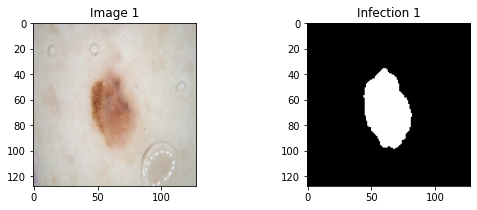

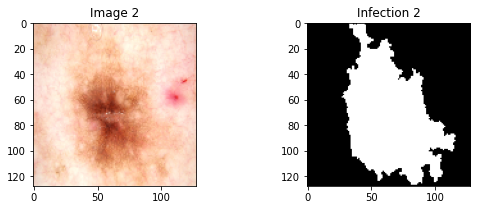

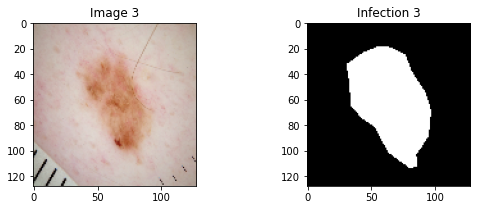

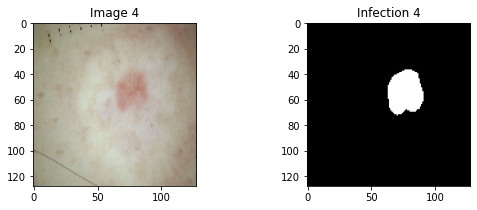

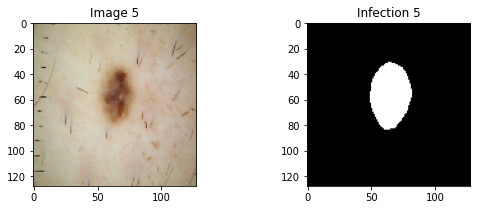

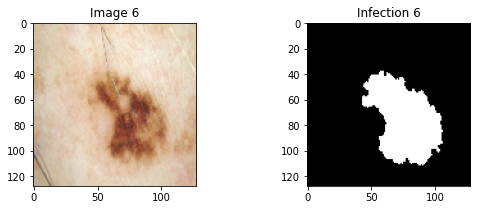

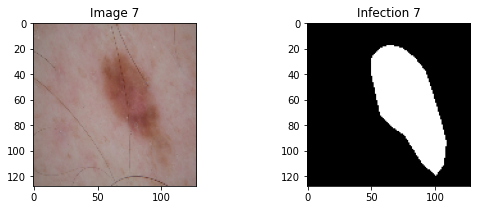

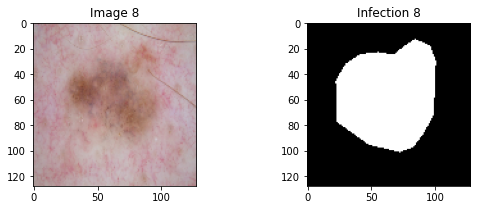

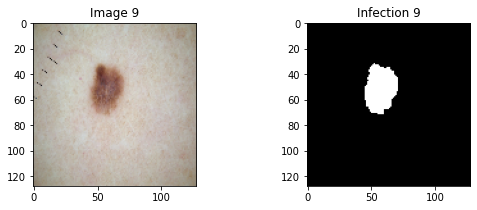

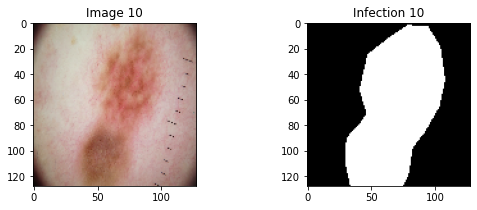

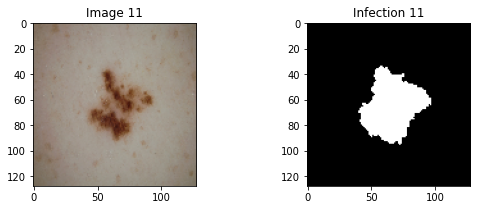

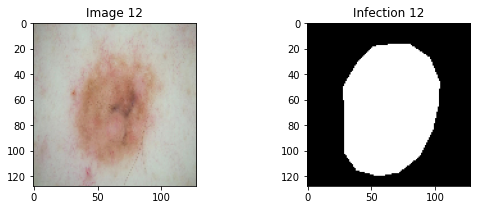

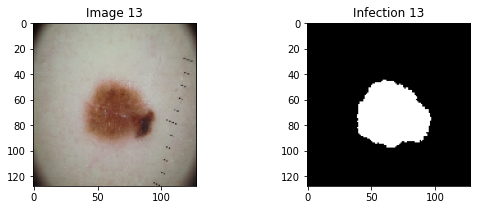

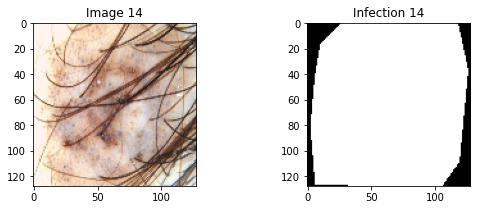

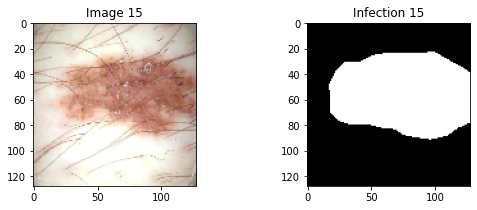

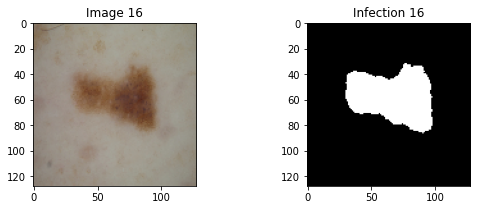

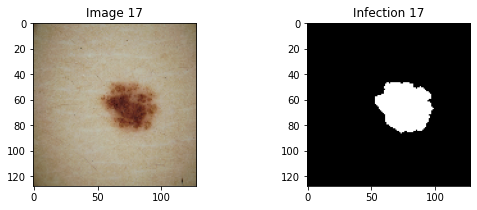

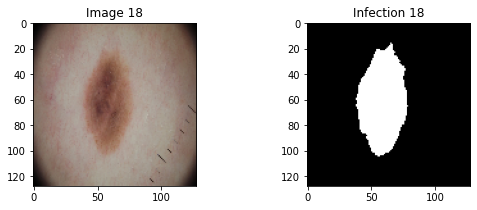

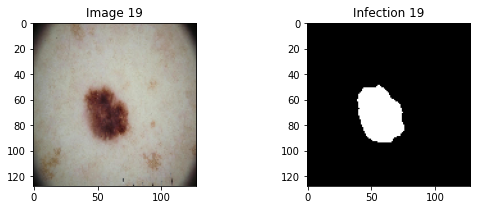

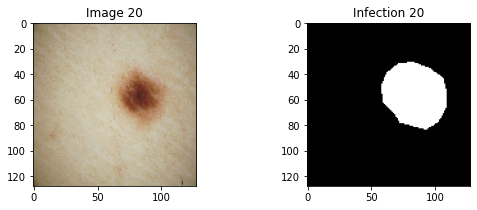

In [9]:
train_idx=np.random.choice(len(train_images_augmented),size=20,replace=False)
for i in range (len(train_idx)):
  plot (np.array(train_images_augmented),np.array(train_masks_augmented),i)

In [10]:
val_imgs_path=val_path+'/'+'ISIC-2017_Validation_Data/'
val_mask_path=val_path+'/'+'ISIC-2017_Validation_Part1_GroundTruth/'
val_images,val_masks=loadfolder(val_imgs_path,val_mask_path)
val_images=np.array(val_images)
val_masks=np.array(val_masks)
val_masks=val_masks.astype("float32")
print(val_images.shape,val_masks.shape)

  0%|          | 0/301 [00:00<?, ?it/s]

(150, 128, 128, 3) (150, 128, 128, 1)


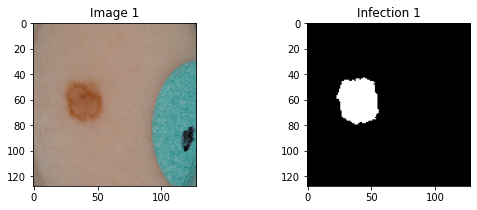

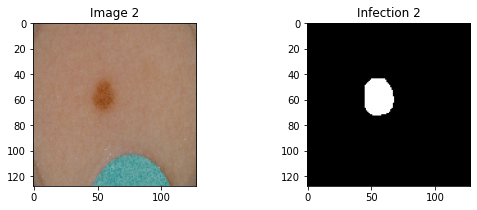

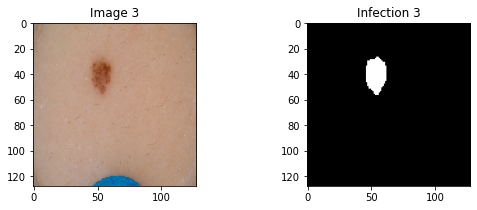

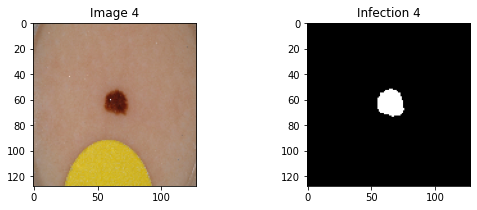

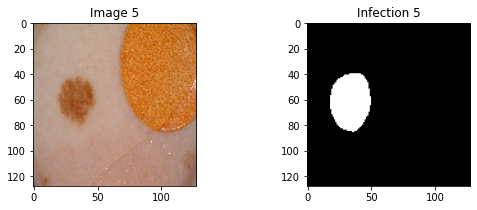

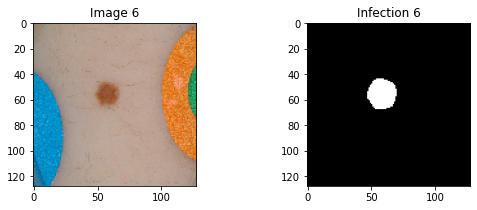

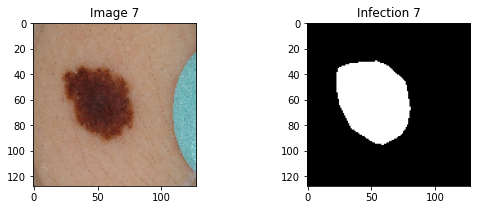

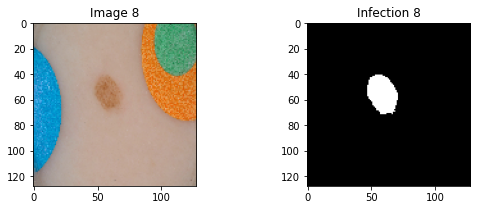

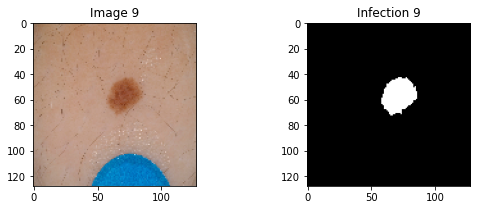

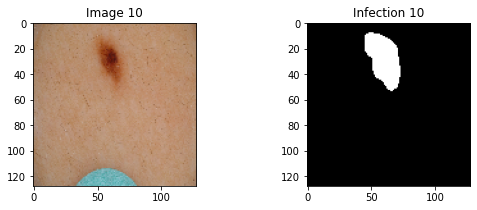

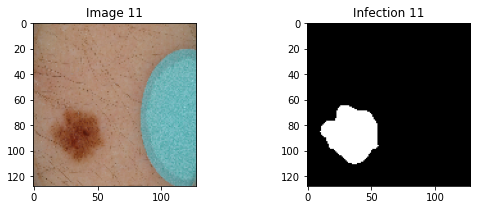

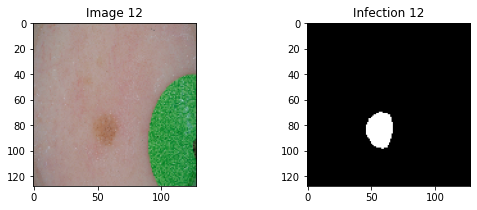

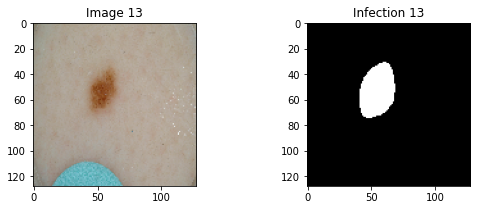

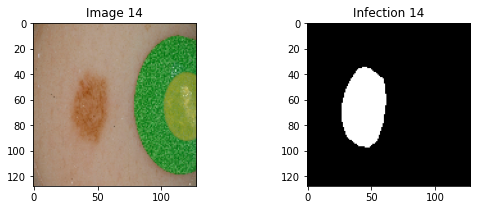

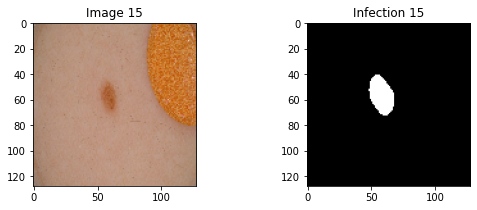

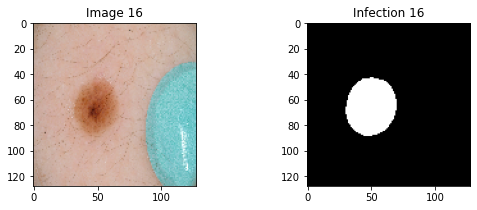

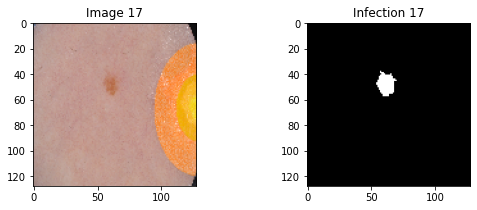

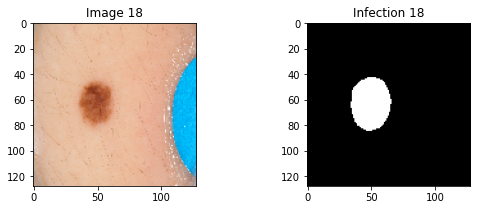

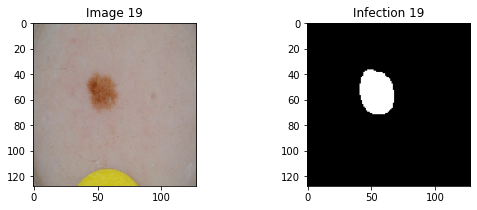

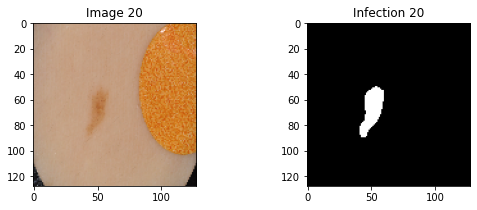

In [11]:
val_idx=np.random.choice(len(val_images),size=20,replace=False)
for i in range (len(val_idx)):
  plot (val_images,val_masks,i)

In [12]:
indices = tf.range(start=0, limit=train_images.shape[0], dtype=tf.int32)

x_train=train_images/255
y_train=train_masks

shuffled_indices = tf.random.shuffle(indices)         
x_train = tf.gather(x_train, shuffled_indices)
y_train = tf.gather(y_train, shuffled_indices)


indices_aug = tf.range(start=0, limit=train_images_augmented.shape[0], dtype=tf.int32)

x_train_aug=train_images_augmented/255
y_train_aug=train_masks_augmented

shuffled_indices_aug = tf.random.shuffle(indices_aug)         
x_train_aug = tf.gather(x_train_aug, shuffled_indices_aug)
y_train_aug = tf.gather(y_train_aug, shuffled_indices_aug)


indices2 = tf.range(start=0, limit=val_images.shape[0], dtype=tf.int32)

x_val=val_images/255
y_val=val_masks
shuffled_indices2 = tf.random.shuffle(indices2)         
x_val = tf.gather(x_val, shuffled_indices2)
y_val = tf.gather(y_val, shuffled_indices2)


print(x_train.shape, y_train.shape)
print(x_train_aug.shape, y_train_aug.shape)

print(x_val.shape, y_val.shape)

(2000, 128, 128, 3) (2000, 128, 128, 1)
(16000, 128, 128, 3) (16000, 128, 128, 1)
(150, 128, 128, 3) (150, 128, 128, 1)


In [13]:
test_imgs_path=test_path+'/'+'ISIC-2017_Test_v2_Data/'
test_mask_path=test_path+'/'+'ISIC-2017_Test_v2_Part1_GroundTruth/'
test_images,test_masks=loadfolder(test_imgs_path,test_mask_path)
test_images=np.array(test_images)
test_masks=np.array(test_masks)
test_masks=test_masks.astype("float32")
x_test=test_images/255
y_test=test_masks
print(test_images.shape,test_masks.shape)

  0%|          | 0/1201 [00:00<?, ?it/s]

(600, 128, 128, 3) (600, 128, 128, 1)


# Losses

In [14]:
def diceCoef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def diceCoefLoss(y_true, y_pred):
    return (1-diceCoef(y_true, y_pred))

In [15]:
def jacc_coef(y_true, y_pred, smooth = 1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + smooth)

def jacc_loss(y_true, y_pred):
    return 1-jacc_coef(y_true, y_pred)


In [16]:
#Keras
def IoU(y_true, y_pred, smooth=1e-6):
    y_pred_f=y_pred>=0.5
    y_pred= tf.cast(y_pred,tf.float32) 
    inputs = tf.reshape(y_pred,[-1])
    targets = tf.reshape(y_true,[-1])
    
    
    intersection = tf.reduce_sum(inputs*targets)
    union = tf.reduce_sum((inputs+targets)-(inputs*targets))
    
    IoU = (intersection + smooth) / (union + smooth)
    return IoU


    
def Jaccard_Loss(y_true, y_pred, smooth=1e-6):
      y_pred=y_pred>=0.5
      y_pred= tf.cast(y_pred,tf.float32) 
      #flatten label and prediction tensors
      inputs = tf.reshape(y_pred,[-1])
      targets = tf.reshape(y_true,[-1])
      
      intersection = tf.reduce_sum(inputs*targets)
      union = tf.reduce_sum((inputs+targets)-(inputs*targets))
    
      IoU = (intersection + smooth) / (union + smooth)
      return 1 - IoU
  

In [17]:
import math
def step_decay(epoch):
  initial_lrate = LR
  drop = 0.5
  epochs_drop = 20.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate
LRScheduler = LearningRateScheduler(step_decay, verbose=1)



reduce_on_plateau = ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.75, patience=12, 
                                                 verbose=1, mode='max', 
                                                 min_lr=0.00001)

In [18]:
def visualize_loss_and_iou(historys):
  for history in historys:
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['IoU']
    train_loss = history.history['loss']
    test_acc = history.history['val_IoU']
    test_loss = history.history['val_loss']

    fig.set_size_inches(20,6)
    ax[0].plot(train_loss , label = f'Training Loss')
    ax[0].plot(test_loss , label = f'Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(train_acc, label = f'Training IOU')
    ax[1].plot(test_acc , label = f'Validation IOU')
    ax[1].set_title('Training & Validation IOU')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

In [19]:
def prediction(model,true_img,y_test):
  y_predict=model.predict(true_img)
  y_predict=y_predict>0.5
  y_predict=y_predict*1
  y_predict=y_predict.astype("float32")
  print(IoU(y_test,y_predict))
  return y_predict

In [20]:
def plot_prediction(img,predict,mask,index,title):
  fig, axes = plt.subplots(1, 3, figsize=(9,3))
  fig.suptitle(title)
  image=copy.deepcopy(img[index])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  axes[0].imshow(image,)
  axes[0].set_title("Image")
  
  mask_predict=np.squeeze(predict[index])
  axes[1].imshow(mask_predict,cmap='gray')
  axes[1].set_title("predict ")
  mask_img=np.squeeze(mask[index])
  axes[2].imshow(mask_img,cmap='gray')
  axes[2].set_title("GT ");

In [21]:
def Showfailureandsuccess(test_images,y_predict,y_test,ind=5):
  test_Iou=np.zeros(y_test.shape[0])
  for i in range (y_test.shape[0]):
    test_Iou[i]=IoU(y_test[i],y_predict[i])
  indices=np.argsort(test_Iou)
  max_indices=indices[-1*ind:]
  min_indices=indices[0:ind]
  print("Success And Failure Cases")
  for i in range (ind):
    plot_prediction(test_images,y_predict,y_test,max_indices[i],"Success Case ("+str(i+1)+")")
  for i in range (ind):
    plot_prediction(test_images,y_predict,y_test,min_indices[i],"Failure Case ("+str(i+1)+")")
  return test_Iou

# FCN

In [22]:
def FCN(input_shape,weights="imagenet"):
    model = Sequential()
    vggModel=tf.keras.applications.VGG16(
    include_top=False,
    weights=weights,
    input_shape=(input_shape,input_shape,3))
    model.add(vggModel)
    ##############FCN(decoder)
    model.add(layers.Conv2D(512,(1,1),
                      activation='relu',
                      padding='same',
                      name='block6_conv1'))
    model.add(BatchNormalization(name='bn1'))

    model.add(layers.Conv2D(1,(1,1),
                      activation='relu',
                      padding='same',
                      name='block6_conv2'))
    model.add(BatchNormalization(name='bn2'))              
    #up sample to image size
    model.add(keras.layers.Conv2DTranspose(filters=1, kernel_size=(64,64), strides=(32,32),
                                     padding='same',
                                     name='fcn16'))
    model.add(BatchNormalization(name='bn3'))
    model.add(layers.Activation(tf.keras.activations.sigmoid))
    return model

## Normal FCN

In [33]:
input_shape=x_train.shape[1]
FCN_model=FCN(input_shape,weights=None)
FCN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 block6_conv1 (Conv2D)       (None, 4, 4, 512)         262656    
                                                                 
 bn1 (BatchNormalization)    (None, 4, 4, 512)         2048      
                                                                 
 block6_conv2 (Conv2D)       (None, 4, 4, 1)           513       
                                                                 
 bn2 (BatchNormalization)    (None, 4, 4, 1)           4         
                                                                 
 fcn16 (Conv2DTranspose)     (None, 128, 128, 1)       4097      
                                                                 
 bn3 (BatchNormalization)    (None, 128, 128, 1)      

In [34]:
LR=5e-3
FCN_model.compile(optimizer= tf.keras.optimizers.Adam(lr = LR), loss= [Jaccard_Loss], metrics=[jacc_coef,IoU,diceCoef])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
history= FCN_model.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=16, epochs = 80, verbose = 1, callbacks = [LRScheduler])


Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
Epoch 1/80
125/125 [==============================] - 7s 49ms/step - loss: 0.7299 - jacc_coef: 0.2701 - IoU: 0.2701 - diceCoef: 0.3607 - val_loss: 0.8301 - val_jacc_coef: 0.1644 - val_IoU: 0.1644 - val_diceCoef: 0.2338 - lr: 0.0050

Epoch 00002: LearningRateScheduler setting learning rate to 0.005.
Epoch 2/80
125/125 [==============================] - 6s 46ms/step - loss: 0.6261 - jacc_coef: 0.3739 - IoU: 0.3739 - diceCoef: 0.4587 - val_loss: 0.7339 - val_jacc_coef: 0.2559 - val_IoU: 0.2559 - val_diceCoef: 0.3245 - lr: 0.0050

Epoch 00003: LearningRateScheduler setting learning rate to 0.005.
Epoch 3/80
125/125 [==============================] - 6s 46ms/step - loss: 0.5344 - jacc_coef: 0.4656 - IoU: 0.4656 - diceCoef: 0.5380 - val_loss: 0.6744 - val_jacc_coef: 0.3296 - val_IoU: 0.3296 - val_diceCoef: 0.3931 - lr: 0.0050

Epoch 00004: LearningRateScheduler setting learning rate to 0.005.
Epoch 4/80
125/125 [============

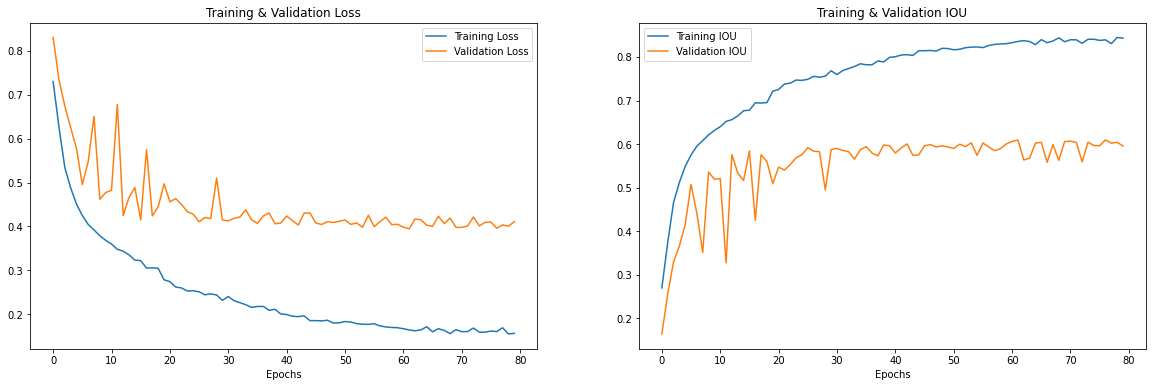

In [36]:
visualize_loss_and_iou([history])

In [37]:
FCN_model.evaluate(x_test,y_test, batch_size = 8)[1]

75/75 [==============================] - 1s 10ms/step - loss: 0.4384 - jacc_coef: 0.5616 - IoU: 0.5616 - diceCoef: 0.6656


0.5616084933280945

In [38]:
y_pred=prediction(FCN_model,x_test,y_test)

tf.Tensor(0.60367393, shape=(), dtype=float32)


Success And Failure Cases


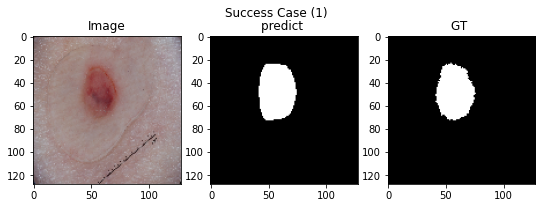

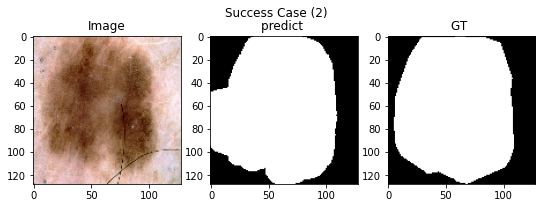

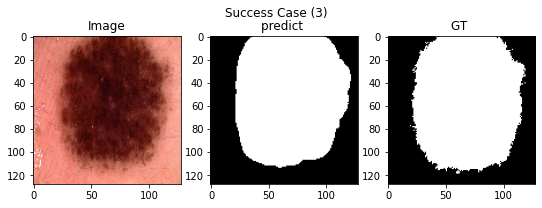

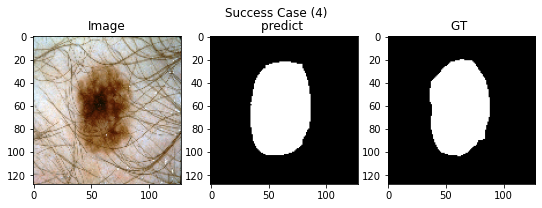

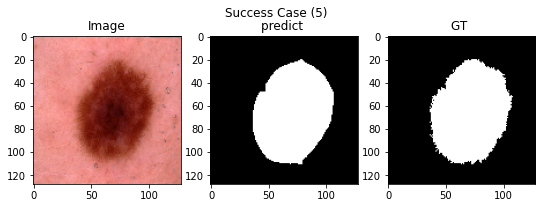

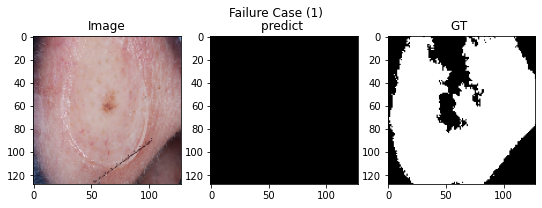

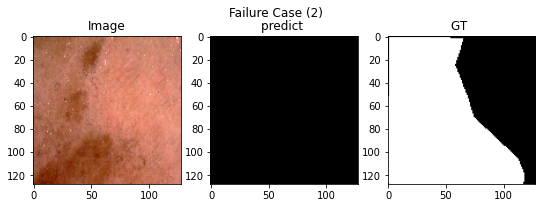

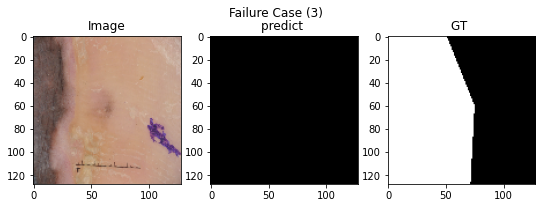

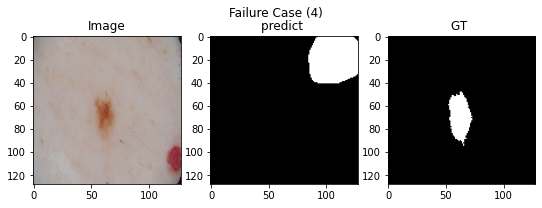

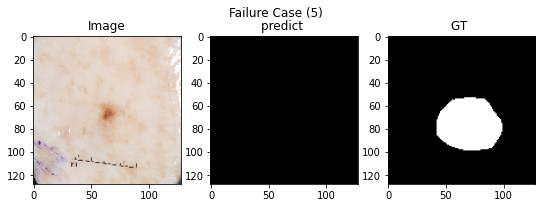

In [39]:
iout=Showfailureandsuccess(test_images,y_pred,y_test)

## ImageNet pretrained

In [ ]:
input_shape=x_train.shape[1]
model_2=FCN(input_shape)
model_2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 block6_conv1 (Conv2D)       (None, 4, 4, 512)         262656    
                                                                 
 bn1 (BatchNormalization)    (None, 4, 4, 512)         2048      
                                                                 
 block6_conv2 (Conv2D)       (None, 4, 4, 1)           513       
                                                                 
 bn2 (BatchNormalization)    (None, 4, 4, 1)           4         
                                                                 
 fcn16 (Conv2DTranspose)     (None, 128, 128, 1)       4097      
                                                                 
 bn3 (BatchNormalization)    (None, 128, 128, 1)     

In [ ]:
LR=5e-3
model_2.compile(optimizer= tf.keras.optimizers.Adam(lr = LR), loss= [Jaccard_Loss], metrics=[jacc_coef,IoU,diceCoef])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_2= model_2.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=16, epochs = 80, verbose = 1, callbacks = [LRScheduler])


Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
Epoch 1/80
125/125 [==============================] - 8s 51ms/step - loss: 0.7128 - jacc_coef: 0.2872 - IoU: 0.2872 - diceCoef: 0.3774 - val_loss: 0.8282 - val_jacc_coef: 0.1678 - val_IoU: 0.1678 - val_diceCoef: 0.2381 - lr: 0.0050

Epoch 00002: LearningRateScheduler setting learning rate to 0.005.
Epoch 2/80
125/125 [==============================] - 6s 50ms/step - loss: 0.6441 - jacc_coef: 0.3559 - IoU: 0.3559 - diceCoef: 0.4427 - val_loss: 0.8094 - val_jacc_coef: 0.1860 - val_IoU: 0.1860 - val_diceCoef: 0.2613 - lr: 0.0050

Epoch 00003: LearningRateScheduler setting learning rate to 0.005.
Epoch 3/80
125/125 [==============================] - 6s 52ms/step - loss: 0.5857 - jacc_coef: 0.4143 - IoU: 0.4143 - diceCoef: 0.4932 - val_loss: 0.6005 - val_jacc_coef: 0.4024 - val_IoU: 0.4024 - val_diceCoef: 0.4670 - lr: 0.0050

Epoch 00004: LearningRateScheduler setting learning rate to 0.005.
Epoch 4/80
125/125 [============

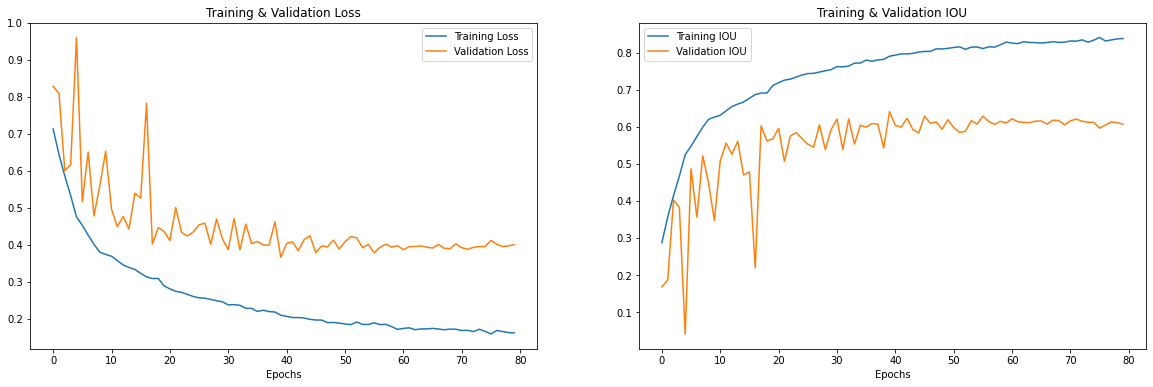

In [ ]:
visualize_loss_and_iou([history_2])

In [ ]:
model_2.evaluate(x_test,y_test, batch_size = 8)[1]

75/75 [==============================] - 1s 11ms/step - loss: 0.4133 - jacc_coef: 0.5867 - IoU: 0.5867 - diceCoef: 0.6838


0.5866913199424744

In [ ]:
y_pred=prediction(model_2,x_test,y_test)

tf.Tensor(0.63429105, shape=(), dtype=float32)


Success And Failure Cases


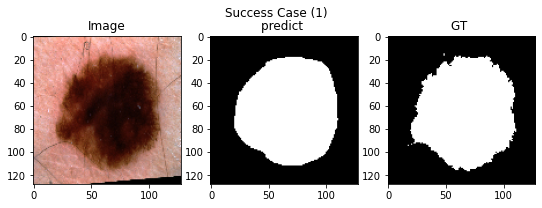

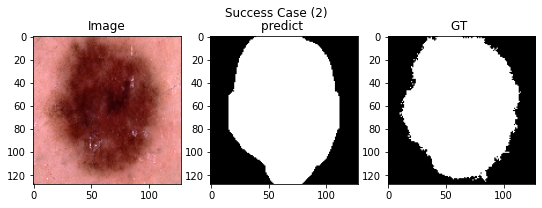

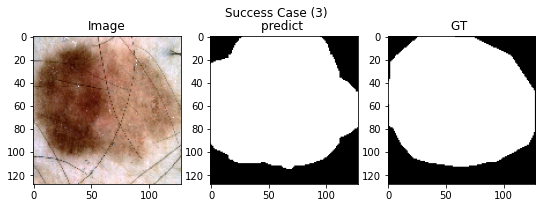

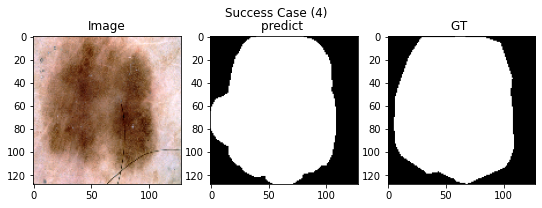

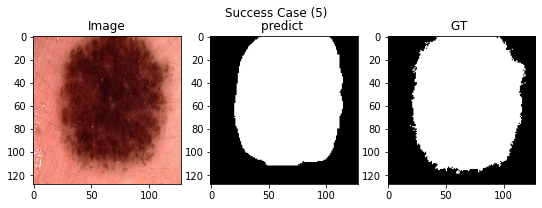

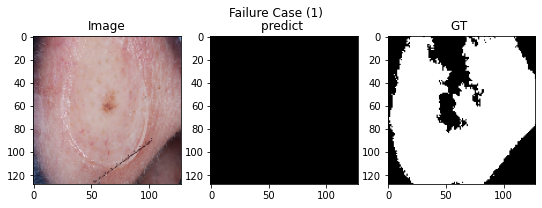

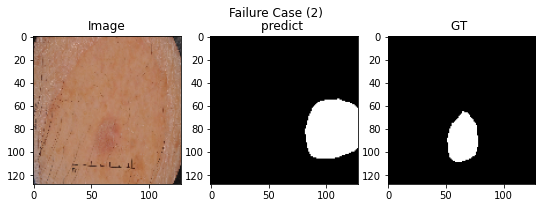

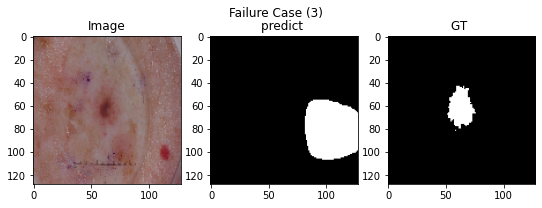

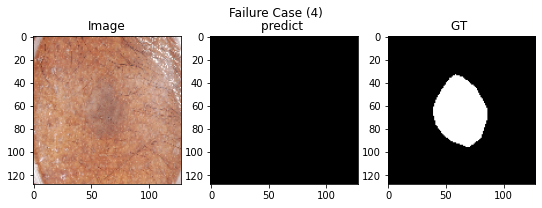

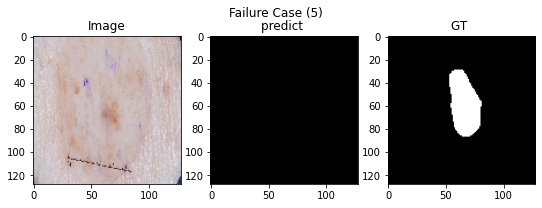

In [ ]:
iout=Showfailureandsuccess(test_images,y_pred,y_test)


In [ ]:
# for i in range(10):
#   plot_prediction(test_images,y_predict,test_masks,i)

## FCN 2

In [ ]:
# def FCN_VGG16(input_shape=128):

#     img_input = layers.Input((input_shape, input_shape, 3))
#     # Block 1
#     x = layers.Conv2D(64, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block1_conv1')(img_input)
#     x = BatchNormalization(name='bn1')(x)
#     x = layers.Conv2D(64, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block1_conv2')(x)
#     x = BatchNormalization(name='bn2')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

#     # Block 2
#     x = layers.Conv2D(128, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block2_conv1')(x)
#     x = BatchNormalization(name='bn3')(x)
#     x = layers.Conv2D(128, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block2_conv2')(x)
#     x = BatchNormalization(name='bn4')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

#     # Block 3
#     x = layers.Conv2D(256, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block3_conv1')(x)
#     x = BatchNormalization(name='bn5')(x)
#     x = layers.Conv2D(256, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block3_conv2')(x)
#     x = BatchNormalization(name='bn6')(x)
#     x = layers.Conv2D(256, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block3_conv3')(x)
#     x = BatchNormalization(name='bn7')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

#     # Block 4
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block4_conv1')(x)
#     x = BatchNormalization(name='bn8')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block4_conv2')(x)
#     x = BatchNormalization(name='bn9')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block4_conv3')(x)
#     x = BatchNormalization(name='bn10')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

#     # Block 5
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block5_conv1')(x)
#     x = BatchNormalization(name='bn11')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block5_conv2')(x)
#     x = BatchNormalization(name='bn12')(x)                  
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block5_conv3')(x)
#     x = BatchNormalization(name='bn13')(x)                  
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
#     ##############FCN(decoder)
#     x=layers.Conv2D(512,(1,1),
#                       activation='relu',
#                       padding='same',
#                       name='block6_conv1') (x)
#     x = BatchNormalization(name='bn14')(x)

#     x=layers.Conv2D(1,(1,1),
#                       activation='relu',
#                       padding='same',
#                       name='block6_conv2') (x)
#     x = BatchNormalization(name='bn15')(x)                  
#     #up sample to image size
#     x = keras.layers.Conv2DTranspose(filters=1, kernel_size=(64,64), strides=(32,32),
#                                      padding='same',
#                                      name='fcn16')(x)
#     x=keras.layers.Activation(tf.keras.activations.sigmoid)(x)
    
                                   
#     model = Model(img_input, x)
    
#     # if weights=='imagenet':
#     #   weights_path = get_file(
#     #             'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
#     #             imagenet_WEIGHTS_PATH,
#     #             cache_subdir='models',
#     #             file_hash='6d6bbae143d832006294945121d1f1fc')
#     #   model.load_weights(weights_path)
#     return model

In [ ]:
FCN_model=FCN_VGG16(128)
model.summary()

NameError: ignored

In [ ]:
LR=1e-2
model.compile(optimizer= tf.keras.optimizers.Adam(lr = LR), loss= [IOU], metrics=[jacc_coef,IOU,diceCoef])

In [ ]:
history= model.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=16, epochs = 80, verbose = 1, callbacks = [LRScheduler])

In [ ]:
visualize_loss_and_iou([history])

In [ ]:
model.evaluate(x_text,y_test)[1]

In [ ]:
def prediction(model,true_img):
  y_predict=model.predict(true_img)
  y_predict=y_predict>0.5
  y_predict=y_predict*1
  return y_predict

In [ ]:
def plot_prediction(img,predict,mask,index):
  fig, axes = plt.subplots(1, 3, figsize=(9,3))
  Image=copy.deepcopy(img[index])
  image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
  axes[0].imshow(image)
  axes[0].set_title("Image "+str(index+1))
  mask_predict=np.squeeze(predict[index])
  axes[1].imshow(mask_predict,cmap='gray')
  axes[1].set_title("predict "+str(index+1))
  print(np.unique(mask_predict))
  mask_img=np.squeeze(mask[index])
  axes[2].imshow(mask_img,cmap='gray')
  axes[2].set_title("GT "+str(index+1));

In [ ]:
y_predict=prediction(model,x_text)

In [ ]:
for i in range(10):
  plot_prediction(test_images,y_predict,y_test,i)

In [ ]:
c=prediction(model,x_train)
for i in range(10):
  plot_prediction(train_images,c,train_masks,i)



In [ ]:
model.save('/content/assets')

# Unet

In [ ]:
def Unet(IMG_SIZE):
#Build the model
    inputs = Input((IMG_SIZE, IMG_SIZE, 3))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(s)
    c1=BatchNormalization()(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu',  padding='same')(c1)
    c1=BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu',  padding='same')(p1)
    c2=BatchNormalization()(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu',padding='same')(c2)
    c2=BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3=BatchNormalization()(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu',  padding='same')(c3)
    c3=BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu',  padding='same')(p3)
    c4=BatchNormalization()(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu',  padding='same')(c4)
    c4=BatchNormalization()(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu',  padding='same')(p4)
    c5=BatchNormalization()(c5)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu',  padding='same')(c5)
    c5=BatchNormalization()(c5)
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6=BatchNormalization()(u6)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu',  padding='same')(u6)
    c6=BatchNormalization()(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu',  padding='same')(c6)
    c6=BatchNormalization()(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7=BatchNormalization()(u7)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7=BatchNormalization()(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    c7=BatchNormalization()(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8=BatchNormalization()(u8)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu',  padding='same')(u8)
    c8=BatchNormalization()(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu',  padding='same')(c8)
    c8=BatchNormalization()(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9=BatchNormalization()(u9)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu',  padding='same')(u9)
    c9=BatchNormalization()(c9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(c9)
    c9=BatchNormalization()(c9)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer = 'adam', loss = [diceCoefLoss], metrics = [jaccard_distance])
    
    
    return model

In [ ]:
input_shape=x_train.shape[1]
Unet_model=Unet(input_shape)
Unet_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_209 (Conv2D)            (None, 128, 128, 16  448         ['input_56[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_198 (Batch  (None, 128, 128, 16  64         ['conv2d_209[0][0]']             
 Normalization)                 )                                                          

In [ ]:
LR=1e-3
Unet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=LR) , loss = [Jaccard_Loss], metrics = [jacc_coef,IoU,diceCoef])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_3= Unet_model.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=16, epochs = 80, verbose = 1, callbacks = [LRScheduler])


Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/80
125/125 [==============================] - 10s 46ms/step - loss: 0.4887 - jacc_coef: 0.5113 - IoU: 0.5113 - diceCoef: 0.5852 - val_loss: 0.7883 - val_jacc_coef: 0.2069 - val_IoU: 0.2069 - val_diceCoef: 0.2891 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/80
125/125 [==============================] - 5s 39ms/step - loss: 0.3171 - jacc_coef: 0.6829 - IoU: 0.6829 - diceCoef: 0.7436 - val_loss: 0.5270 - val_jacc_coef: 0.4802 - val_IoU: 0.4801 - val_diceCoef: 0.5751 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/80
125/125 [==============================] - 4s 34ms/step - loss: 0.2827 - jacc_coef: 0.7173 - IoU: 0.7173 - diceCoef: 0.7874 - val_loss: 0.4569 - val_jacc_coef: 0.5517 - val_IoU: 0.5517 - val_diceCoef: 0.6863 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/80
125/125 [===========

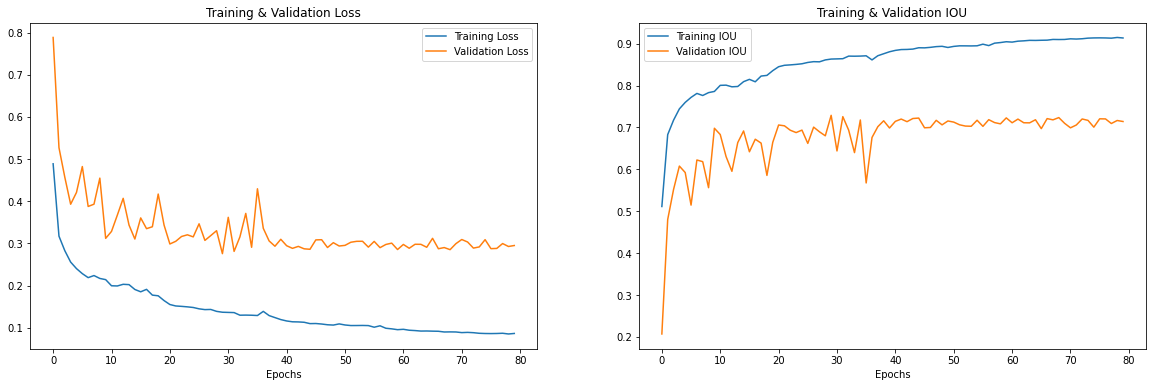

In [ ]:
visualize_loss_and_iou([history_3])

In [ ]:
Unet_model.evaluate(x_test,y_test, batch_size = 8)[1]

75/75 [==============================] - 1s 8ms/step - loss: 0.3192 - jacc_coef: 0.6808 - IoU: 0.6808 - diceCoef: 0.8243


0.6807973980903625

In [ ]:
y_pred=prediction(Unet_model,x_test,y_test)

tf.Tensor(0.691017, shape=(), dtype=float32)


Success And Failure Cases


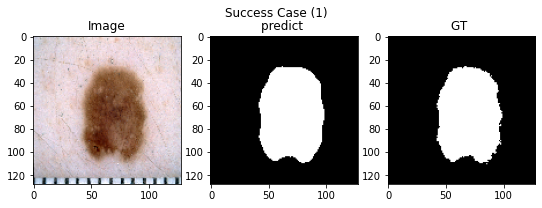

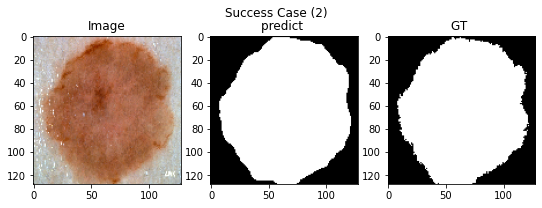

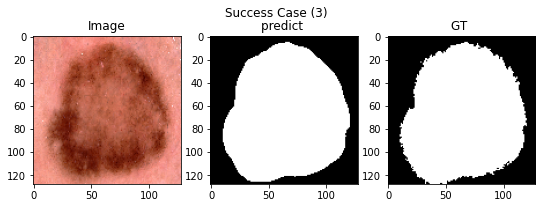

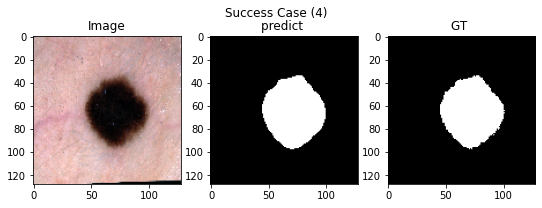

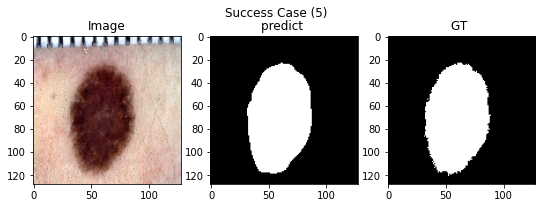

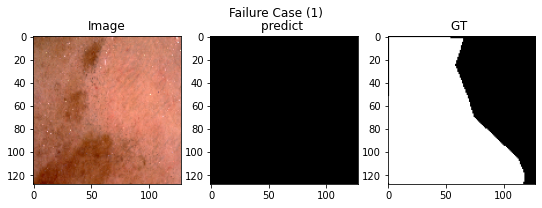

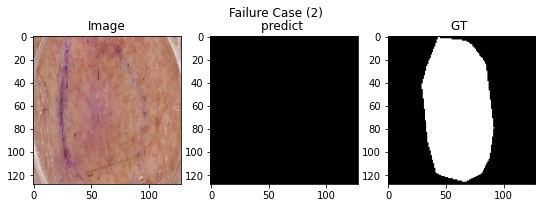

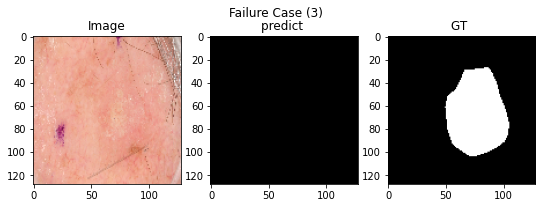

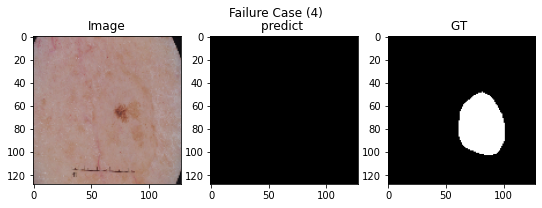

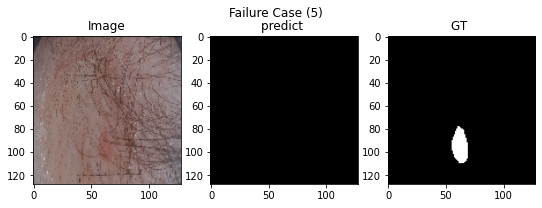

In [ ]:
iout=Showfailureandsuccess(test_images,y_pred,y_test)